In [30]:
import numpy as np
import pandas as pd

In [37]:
operation_train = pd.read_csv('../data/operation_train_new.csv')
transaction_train = pd.read_csv('../data/transaction_train_new.csv')
tag_train = pd.read_csv('../data/tag_train_new.csv')

<img style="float: left;" src="http://third.datacastle.cn/pkbigdata/master.other.img/8ef429f9-2032-47b8-bcc4-818fa9e41a25.png" width="50%">

In [39]:
print(operation_train.shape)
print(transaction_train.shape)

(1460843, 20)
(264654, 27)


In [121]:
def operation_len(idx):
    return len(operation_train[operation_train['UID'] == idx])
def transaction_len(idx):
    return len(transaction_train[transaction_train['UID'] == idx])
def single_uid_in_tran(op_uids, tran_uids):
    s = []
    for uid in op_uids:
        if uid not in tran_uids:
            s.append(uid)
        else:
            tran_uids.remove(uid)
    return s, tran_uids

In [107]:
op_train = operation_train.sort_values(by='UID',ascending=True)
tran_train = transaction_train.sort_values(by='UID',ascending=True)
tag_train = tag_train.sort_values(by='UID', ascending=True)

In [108]:
print(len(op_train.groupby('UID')))
print(len(tran_train.groupby('UID')))
print(len(tag_train.groupby('UID')))

29728
30542
31179


In [111]:
type( op_train.groupby('UID').groups)

dict

In [127]:
op_train_uids = []
for uid, item in op_train.groupby('UID').groups.items():
    op_train_uids.append(uid)
tran_train_uids = []
for uid, item in tran_train.groupby('UID').groups.items():
    tran_train_uids.append(uid)
op_train_uids = np.array(op_train_uids)
tran_train_uids = np.array(tran_train_uids)

In [122]:
s, t = single_uid_in_tran(op_train_uids, tran_train_uids)

In [126]:
if 10000 in tran_train_uids:
    print('yes')

yes


In [123]:
print(s)
print(t)

[10000, 10001, 10002, 10003, 10004, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10014, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10041, 10042, 10043, 10044, 10045, 10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054, 10055, 10056, 10057, 10058, 10059, 10060, 10061, 10062, 10102, 10141, 10194, 10262, 10293, 10316, 10347, 10361, 10378, 10390, 10406, 10431, 10466, 10490, 10503, 10549, 10611, 10620, 10678, 10691, 10767, 10782, 10937, 10979, 11017, 11057, 11113, 11196, 11223, 11255, 11257, 11337, 11478, 11481, 11489, 11511, 11621, 11626, 11654, 11655, 11737, 11764, 11803, 11806, 11857, 11865, 11994, 12063, 12084, 12126, 12305, 12316, 12396, 12425, 12443, 12462, 12485, 12492, 12523, 12542, 12567, 12599, 12614, 12629, 12645, 12652, 12653, 12707, 12760, 12776, 12828, 12854, 12904, 12917, 13053, 13074, 13146, 13159, 13195, 13229, 13310, 13323, 13329, 13432

In [34]:
tag_true = tag_train[tag_train['Tag']==1]
tag_false = tag_train[tag_train['Tag']==0]

In [47]:
len_op_true=[]
len_tran_true=[]
len_op_false=[]
len_tran_false=[]
%timeit
print('start tag_true...')
for idx in tag_true['UID'].values:
    len_op_true.append(operation_len(idx))
    len_tran_true.append(transaction_len(idx))
print('start tag_false...')
for idx in tag_false['UID'].values:
    len_op_false.append(operation_len(idx))
    len_tran_false.append(transaction_len(idx))

start tag_true...
start tag_false...


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
len_op_true = np.array(len_op_true)
len_tran_true = np.array(len_tran_true)
len_op_false = np.array(len_op_false)
len_tran_false = np.array(len_tran_false)

In [60]:
print(len_op_true.shape, len_tran_true.shape)
print(len_op_false.shape, len_tran_false.shape)

(4285,) (4285,)
(26894,) (26894,)


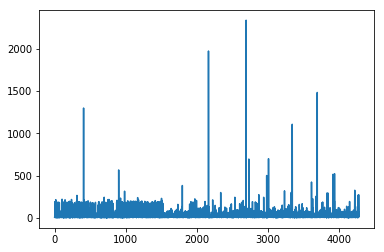

In [64]:
plt.plot(len_op_true)

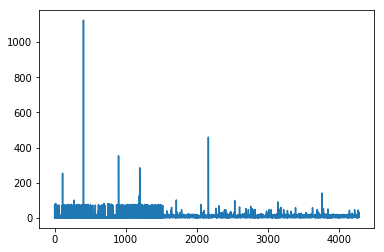

In [65]:
plt.plot(len_tran_true)

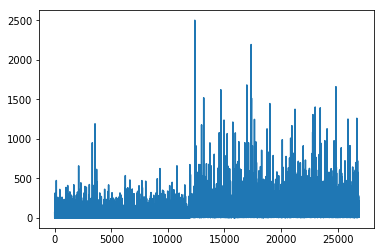

In [62]:
plt.plot(len_op_false)

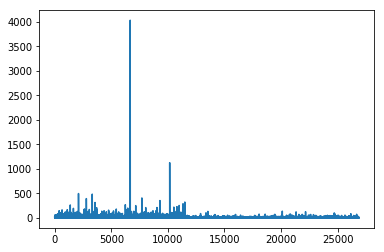

In [63]:
plt.plot(len_tran_false)